# Análisis de Series de Tiempo (TSA)

In [4]:
import quandl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
QUANDL_API_KEY = '4sLKuvo8LszEsAF1Kqgr'  # Your Quandl key here
quandl.ApiConfig.api_key = QUANDL_API_KEY

In [5]:
mydata = quandl.get("FRED/GDP")
mydata

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2020-07-01,21138.574
2020-10-01,21477.597
2021-01-01,22038.226


In [8]:
df = quandl.get('CHRIS/CME_GC1', column_index=6, collapse='Weekly', start_date='2010-01-01')

Date
2010-02-01    1104.3
2010-03-01    1118.3
2010-04-01    1125.1
2010-05-01    1180.7
2010-06-01    1224.8
               ...  
2021-02-01    1866.0
2021-03-01    1725.8
2021-04-01    1728.4
2021-05-01    1767.7
2021-06-01    1902.9
Freq: MS, Name: Settle, Length: 137, dtype: float64

Agrupamiento por mes  

In [14]:
df_settle = df['Settle'].resample('MS').ffill().dropna()

In [20]:
# Ventana dinámica
df_rolling = df_settle.rolling(3)
# Media
df_mean = df_rolling.mean()
# Desviación estándar
df_std = df_rolling.std()

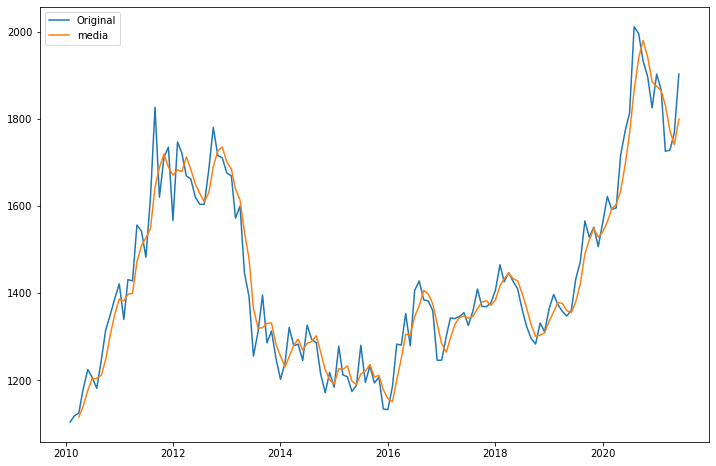

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(df_settle, label='Original')
plt.plot(df_mean, label='media')
plt.legend()

Descomposición

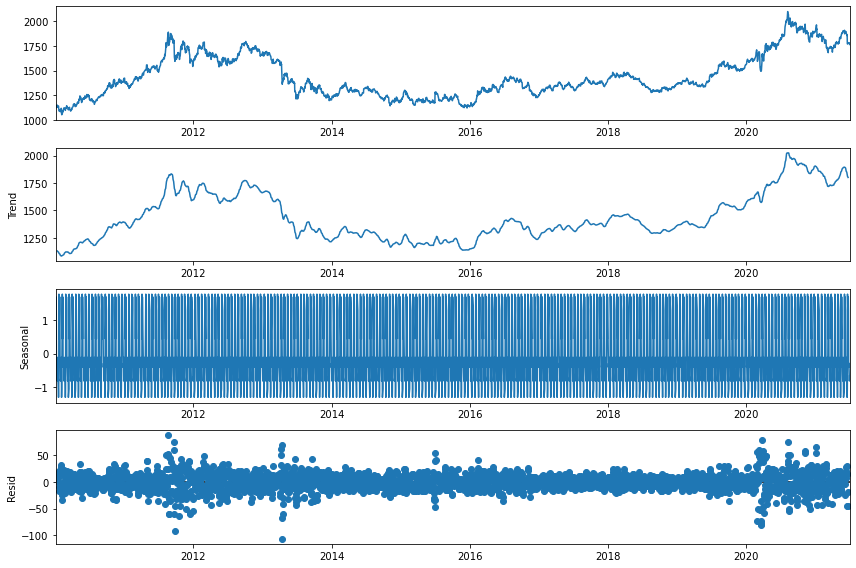

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
#  12 es el número de periodos 
decompose_result = seasonal_decompose(df.dropna(), period=12)
df_trend = decompose_result.trend 
df_season = decompose_result.seasonal
df_residual = decompose_result.resid

plt.rcParams['figure.figsize'] = (12, 8)
fig = decompose_result.plot()